In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import matplotlib.pyplot as plt


In [6]:

#file_path = '/Users/katrina/Desktop/final_dataset_with_adjusted_prices_simulated_turkey_sales (2)(1).csv'  
data = pd.read_csv('final_dataset_with_adjusted_prices_simulated_turkey_sales.csv')
data['Date'] = pd.to_datetime(data['Date'])


In [7]:
#Build time series models of competitor prices
competitor_price_data = data[['Date', 'Unit_Price_Competitor']]
competitor_price_data.set_index('Date', inplace=True)
competitor_price_data_weekly = competitor_price_data.resample('W').mean().dropna()


In [8]:
# ARIMA model predict one week price
arima_competitor = ARIMA(competitor_price_data_weekly, order=(5,1,0))
arima_competitor_result = arima_competitor.fit()
forecast_competitor_price = arima_competitor_result.forecast(steps=1)  

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

In [9]:
# our company time series model
our_price_data = data[['Date', 'Inventory_Our_Company', 'Unit_Price_Our_Company']]
our_price_data.set_index('Date', inplace=True)
our_price_data_weekly = our_price_data.resample('W').mean().dropna()

In [10]:
# predict one week price
arima_our_company = ARIMA(our_price_data_weekly['Unit_Price_Our_Company'], order=(5,1,0))
arima_our_company_result = arima_our_company.fit()
forecast_our_price = arima_our_company_result.forecast(steps=1)  


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

In [11]:
# setting price
adjustment_amount = 5

adjusted_price = (forecast_our_price.iloc[0] - adjustment_amount 
                  if forecast_our_price.iloc[0] > forecast_competitor_price.iloc[0] 
                  else forecast_our_price.iloc[0])

In [12]:

print("competitor：", forecast_competitor_price.iloc[0])
print("our_price：", forecast_our_price.iloc[0])
print("adjusted_price：", adjusted_price)

competitor： 51.92398788125271
our_price： 43.462120275946376
adjusted_price： 43.462120275946376


In [13]:

last_date = data['Date'].max()


prediction_date = last_date + pd.DateOffset(weeks=1)


print("predict_date：", prediction_date.strftime('%Y-%m-%d'))


predict_date： 2023-12-12


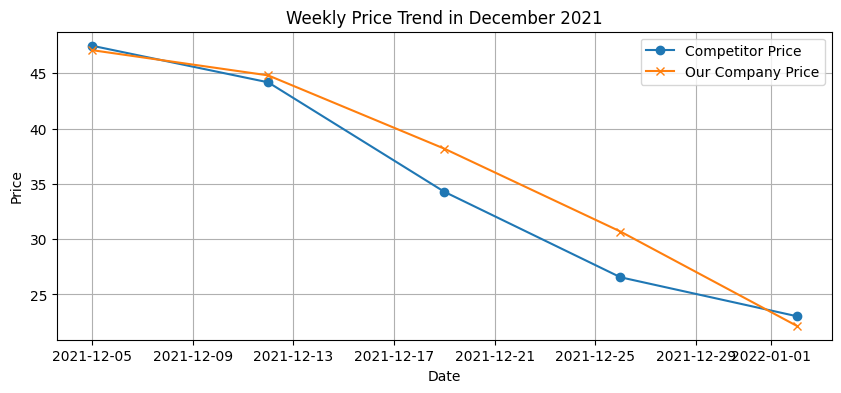

In [14]:


data_dec_2021 = data[(data['Date'].dt.year == 2021) & (data['Date'].dt.month == 12)]

weekly_dec_2021 = data_dec_2021[['Unit_Price_Competitor', 'Unit_Price_Our_Company']].set_index(data_dec_2021['Date']).resample('W').mean()


plt.figure(figsize=(10, 4))
plt.plot(weekly_dec_2021.index, weekly_dec_2021['Unit_Price_Competitor'], label='Competitor Price', marker='o')
plt.plot(weekly_dec_2021.index, weekly_dec_2021['Unit_Price_Our_Company'], label='Our Company Price', marker='x')
plt.title('Weekly Price Trend in December 2021')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


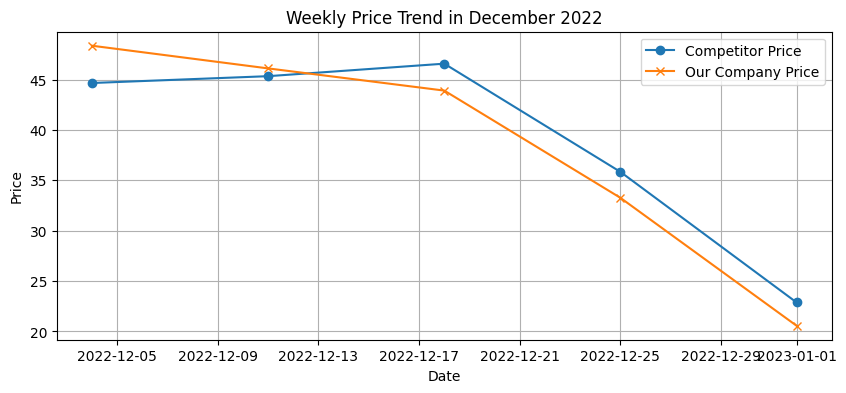

In [15]:


data_dec_2022 = data[(data['Date'].dt.year == 2022) & (data['Date'].dt.month == 12)]


weekly_dec_2022 = data_dec_2022[['Unit_Price_Competitor', 'Unit_Price_Our_Company']].set_index(data_dec_2022['Date']).resample('W').mean()


plt.figure(figsize=(10, 4))
plt.plot(weekly_dec_2022.index, weekly_dec_2022['Unit_Price_Competitor'], label='Competitor Price', marker='o')
plt.plot(weekly_dec_2022.index, weekly_dec_2022['Unit_Price_Our_Company'], label='Our Company Price', marker='x')
plt.title('Weekly Price Trend in December 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

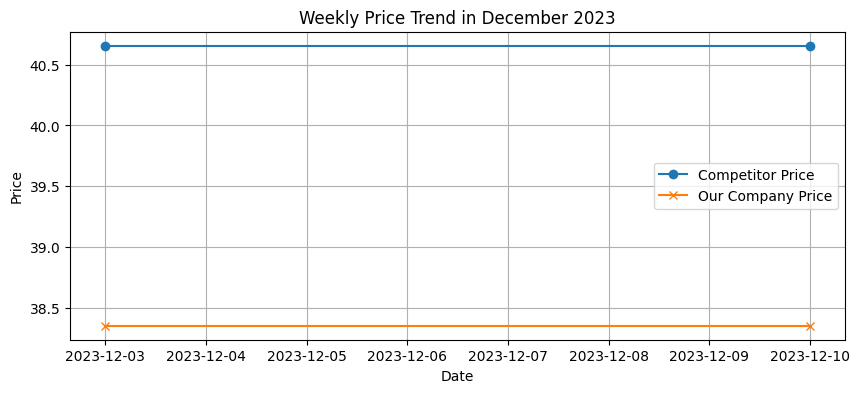

In [16]:

data_dec_2023 = data[(data['Date'].dt.year == 2023) & (data['Date'].dt.month == 12)]


weekly_dec_2023 = data_dec_2023[['Unit_Price_Competitor', 'Unit_Price_Our_Company']].set_index(data_dec_2023['Date']).resample('W').mean()


plt.figure(figsize=(10, 4))
plt.plot(weekly_dec_2023.index, weekly_dec_2023['Unit_Price_Competitor'], label='Competitor Price', marker='o')
plt.plot(weekly_dec_2023.index, weekly_dec_2023['Unit_Price_Our_Company'], label='Our Company Price', marker='x')
plt.title('Weekly Price Trend in December 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Assume elasticity is -0.5 (replace this with your actual elasticity)
elasticity = -1.5

our_price = 50 #assumed price

# Forecasted percentage change in price from your dynamic pricing model
forecasted_price_change = ((our_price - forecast_our_price.iloc[0]) / forecast_our_price.iloc[0]) * 100

# Calculate the absolute value of the elasticity
abs_elasticity = abs(elasticity)

# Calculate the estimated percentage change in quantity demanded
percent_change_quantity_demanded = abs_elasticity * forecasted_price_change

# Current sales volume (replace this with your actual current sales)
current_sales_volume = 1000

# Calculate the expected percentage change in sales
expected_percent_change_in_sales = percent_change_quantity_demanded

# Calculate the expected increase or decrease in sales
expected_sales_increase = (1 + expected_percent_change_in_sales / 100) * current_sales_volume - current_sales_volume

print(f"Expected Sales Increase: {expected_sales_increase}")


Expected Sales Increase: 225.6406158699972
